In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
iris_data = pd.read_csv('C:/Users/Thales/Downloads/iris.csv')

In [3]:
iris_data.head(2)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa


In [4]:
np.unique(iris_data['variety'])

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

<AxesSubplot:>

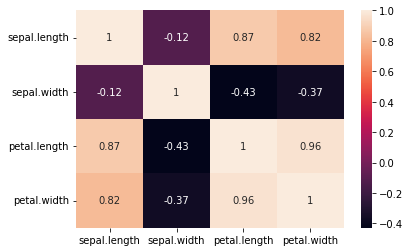

In [5]:
#correlation
iris_correlation = iris_data.corr()
sns.heatmap(iris_correlation, annot=True)

Text(0.5, 1.0, 'Scatter Plot Species length vs width')

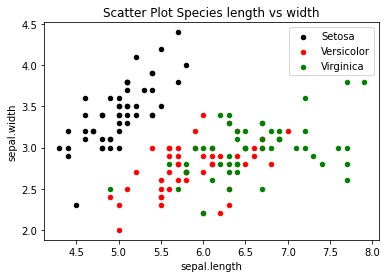

In [6]:
#Scatter Plot
ax = iris_data[iris_data.variety=='Setosa'].plot.scatter(x='sepal.length', y='sepal.width', color='black', label='Setosa')
iris_data[iris_data.variety=='Versicolor'].plot.scatter(x='sepal.length', y='sepal.width', color='red', label='Versicolor', ax=ax)
iris_data[iris_data.variety=='Virginica'].plot.scatter(x='sepal.length', y='sepal.width', color='green', label='Virginica', ax=ax)
ax.set_title('Scatter Plot Species length vs width')

In [7]:
#Label Encoding -For encoding categorical feature into numerical ones.
encoder = LabelEncoder()
iris_data['variety'] = encoder.fit_transform(iris_data['variety'])

In [8]:
np.unique(iris_data['variety'])

array([0, 1, 2])

In [9]:
#converting dataframe to numpy array
iris_numpy_data = iris_data.values
X=iris_numpy_data[:,0:5]
Y = iris_numpy_data[:,-1]
X.shape,Y.shape

((150, 5), (150,))

In [10]:
# train/test split
train_x = X[:112,]
train_y = Y[:112,]
test_x = X[112:150,]
test_y = Y[112:150,]

In [11]:
#KMeans
kmeans=KMeans(n_clusters=3)
#Model
kmeans.fit(train_x, train_y)

KMeans(n_clusters=3)

In [12]:

#Training predictions
train_labels = kmeans.predict(train_x)
#Testing predictions
test_labels = kmeans.predict(test_x)

In [13]:
#KMeans model accuracy

#training accuracy
print(accuracy_score(train_y, train_labels)*100)
#testing accuracy
print(accuracy_score(test_labels, test_y)*100)

9.821428571428571
94.73684210526315


In [14]:
print(train_y[0:5])
print(train_labels[0:5])

[0. 0. 0. 0. 0.]
[1 1 1 1 1]


In [15]:
print(test_labels[0:5])
print(test_y[0:5])

[2 2 2 2 2]
[2. 2. 2. 2. 2.]


What is the advantage as well as disadvantage of KMeans?

Ans: An advantage of KMeans is that it is computationally very fast. A disadvantage of the same is that it does not work too well with clusters of different sizes. 
 
What is the importance of clustering in ML?

Ans: Clustering helps identify and group similar data points in larger datasets without concern for the specific outcome.
 
What does the ‘K’ in K-Means stand for?

Ans: ‘K’ refers to the number of clusters in K-means.

In [16]:
#classification report for training set 
print(classification_report(train_y, train_labels))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        50
         1.0       0.00      0.00      0.00        50
         2.0       1.00      0.92      0.96        12

    accuracy                           0.10       112
   macro avg       0.33      0.31      0.32       112
weighted avg       0.11      0.10      0.10       112



HIERARCHICAL CLUSTER

In [17]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
%matplotlib inline

In [18]:
hierarchy_train_X = train_x
hierarchy_train_Y = train_y
hierarchy_test_X = test_x
hierarchy_test_Y = train_y

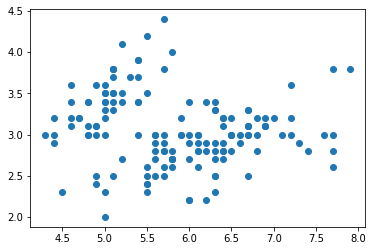

In [19]:
plt.scatter(X[:, 0], X[:, 1], marker='o') 

In [20]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

In [21]:
agglom.fit(X,Y)

AgglomerativeClustering(linkage='average', n_clusters=4)

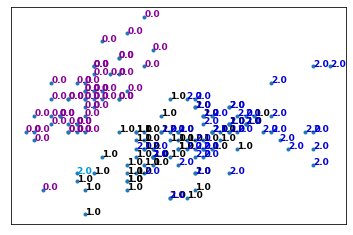

In [22]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)

# Get the average distance for X1.
X = (X - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X[i, 0], X[i, 1], str(Y[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X[:, 0], X[:, 1], marker='.')
# Display the plot
plt.show()

In [23]:
dist_matrix = distance_matrix(X,X) 
print(dist_matrix)

[[0.         0.21561354 0.16810102 ... 1.47375733 1.52327389 1.38942712]
 [0.21561354 0.         0.10157824 ... 1.47473869 1.54384003 1.38379288]
 [0.16810102 0.10157824 0.         ... 1.50212777 1.5585531  1.40617329]
 ...
 [1.47375733 1.47473869 1.50212777 ... 0.         0.226928   0.18710825]
 [1.52327389 1.54384003 1.5585531  ... 0.226928   0.         0.28409587]
 [1.38942712 1.38379288 1.40617329 ... 0.18710825 0.28409587 0.        ]]


In [24]:
Z = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\Thales\AppData\Local\Temp\ipykernel_8292\3518085107.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


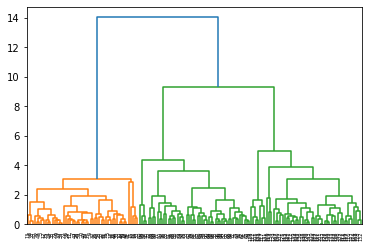

In [25]:
dendro = hierarchy.dendrogram(Z)

In [26]:
from sklearn.preprocessing import MinMaxScaler
X_ = iris_data.values

In [27]:
min_max_scaler = MinMaxScaler()
feature_min_max = min_max_scaler.fit_transform(X_)
feature_min_max[0:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667, 0.        ],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667, 0.        ],
       [0.11111111, 0.5       , 0.05084746, 0.04166667, 0.        ],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667, 0.        ],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667, 0.        ]])

Cluster the data using distance matrix

In [28]:
import scipy
length = feature_min_max.shape[0]
Distance=scipy.zeros([length, length])
for i in range(length):
    for j in range(length):
        Distance[i,j] = scipy.spatial.distance.euclidean(feature_min_max[i], feature_min_max[j])
Distance

C:\Users\Thales\AppData\Local\Temp\ipykernel_8292\4042902393.py:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  Distance=scipy.zeros([length, length])


array([[0.        , 0.21561354, 0.16810102, ..., 1.47375733, 1.52327389,
        1.38942712],
       [0.21561354, 0.        , 0.10157824, ..., 1.47473869, 1.54384003,
        1.38379288],
       [0.16810102, 0.10157824, 0.        , ..., 1.50212777, 1.5585531 ,
        1.40617329],
       ...,
       [1.47375733, 1.47473869, 1.50212777, ..., 0.        , 0.226928  ,
        0.18710825],
       [1.52327389, 1.54384003, 1.5585531 , ..., 0.226928  , 0.        ,
        0.28409587],
       [1.38942712, 1.38379288, 1.40617329, ..., 0.18710825, 0.28409587,
        0.        ]])

In agglomerative clustering, at each iteration, the algorithm must update the distance matrix to reflect the distance of the newly formed cluster with the remaining clusters in the forest.
The following methods are supported in Scipy for calculating the distance between the newly formed cluster and each:
\- single
\- complete
\- average
\- weighted
\- centroid

In [29]:
import pylab
import scipy.cluster.hierarchy
Z_ = hierarchy.linkage(Distance, "complete")

C:\Users\Thales\AppData\Local\Temp\ipykernel_8292\3041396727.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_ = hierarchy.linkage(Distance, "complete")


Essentially, Hierarchical clustering does not require a pre-specified number of clusters. However, in some applications we want a partition of disjoint clusters just as in flat clustering.
So you can use a cutting line:

In [30]:
from scipy.cluster.hierarchy import fcluster
max_d =3
clusters=fcluster(Z_,max_d,criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 5, 4, 5, 4, 3, 4, 5, 3, 5, 5, 5, 5, 4,
       5, 5, 4, 5, 4, 5, 4, 5, 5, 4, 4, 4, 5, 5, 5, 5, 5, 4, 5, 4, 4, 4,
       5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 3, 5, 8, 9, 8, 9, 8, 6, 7, 8, 9, 6,
       9, 9, 8, 9, 9, 8, 9, 6, 6, 7, 8, 9, 6, 9, 8, 8, 9, 9, 9, 8, 8, 6,
       9, 9, 7, 6, 8, 9, 9, 8, 8, 8, 9, 8, 8, 8, 9, 9, 8, 9], dtype=int32)

Determine the number of clusters directly

In [31]:
from scipy.cluster.hierarchy import fcluster
k=5
clusters=fcluster(Z_,k,criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 5, 5, 5, 5, 5, 4, 5, 5, 5, 4,
       5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4,
       5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int32)

In [32]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_min_max, feature_min_max)
print(dist_matrix)

[[0.         0.21561354 0.16810102 ... 1.47375733 1.52327389 1.38942712]
 [0.21561354 0.         0.10157824 ... 1.47473869 1.54384003 1.38379288]
 [0.16810102 0.10157824 0.         ... 1.50212777 1.5585531  1.40617329]
 ...
 [1.47375733 1.47473869 1.50212777 ... 0.         0.226928   0.18710825]
 [1.52327389 1.54384003 1.5585531  ... 0.226928   0.         0.28409587]
 [1.38942712 1.38379288 1.40617329 ... 0.18710825 0.28409587 0.        ]]


In [33]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\Thales\AppData\Local\Temp\ipykernel_8292\1633147189.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


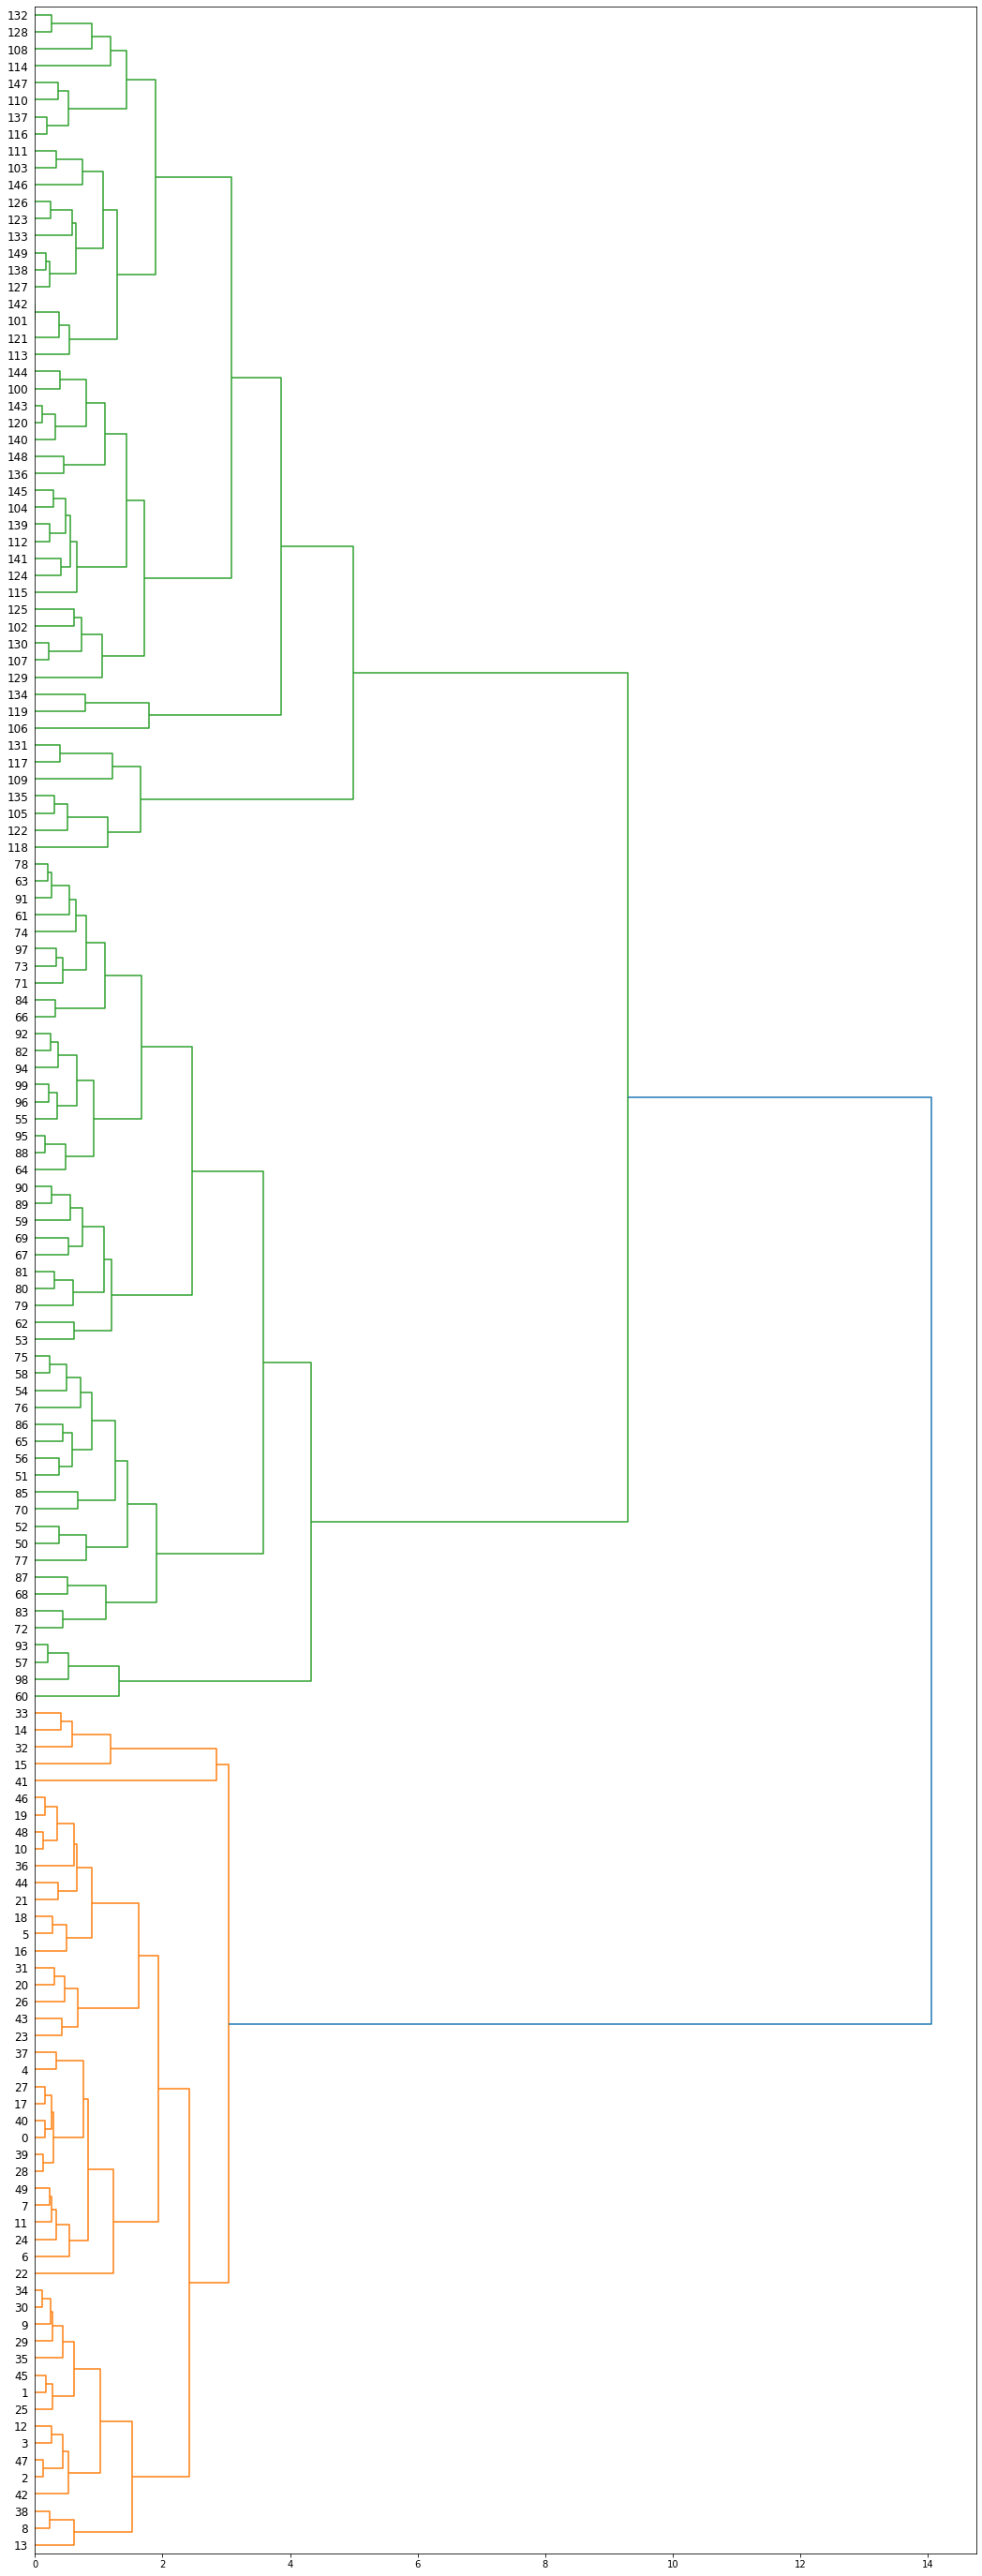

In [34]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (iris_data['variety'][id])
dendro = hierarchy.dendrogram(Z_using_dist_matrix, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [35]:
hierarchy_agg_model = AgglomerativeClustering(n_clusters=4, linkage='average')
hierarchy_agg_model.fit(dist_matrix)
hierarchy_agg_model.labels_

c:\Users\Thales\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:541: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [36]:
iris_data['cluster_']=hierarchy_agg_model.labels_
iris_data.head(2)

,sepal.length,sepal.width,petal.length,petal.width,variety,cluster_
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1


In [37]:
iris_data.columns.str.replace('sepal.length', 'sepal_length')

C:\Users\Thales\AppData\Local\Temp\ipykernel_8292\1147594508.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  iris_data.columns.str.replace('sepal.length', 'sepal_length')


Index(['sepal_length', 'sepal.width', 'petal.length', 'petal.width', 'variety',
       'cluster_'],
      dtype='object')

In [38]:
iris_data.set_axis(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species', 'cluster_'], axis='columns', inplace=True)

In [39]:
iris_data.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'sepal.width')

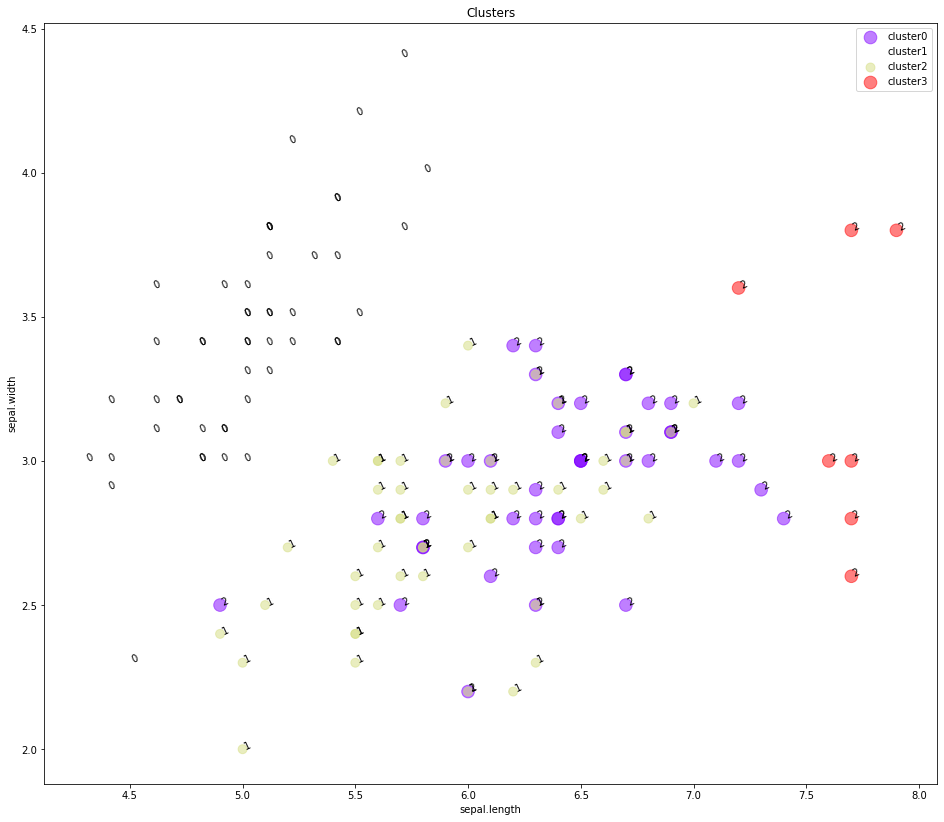

In [40]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = iris_data[iris_data.cluster_ == label]
    for i in subset.index:
            plt.text(subset.sepal_length[i], subset.sepal_width[i],str(subset['species'][i]), rotation=25) 
    plt.scatter(subset.sepal_length, subset.sepal_width, s= subset.species*80, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('sepal.length')
plt.ylabel('sepal.width')

In [41]:
iris_data.groupby(['cluster_','species'])['cluster_'].count()

cluster_  species
0         2          43
1         0          50
2         1          50
3         2           7
Name: cluster_, dtype: int64

In [42]:
agg_species = iris_data.groupby(['cluster_', 'species'])['sepal_length', 'sepal_width', 'petal_length', 'petal_width'].mean()
agg_species

C:\Users\Thales\AppData\Local\Temp\ipykernel_8292\2221859655.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_species = iris_data.groupby(['cluster_', 'species'])['sepal_length', 'sepal_width', 'petal_length', 'petal_width'].mean()


,,sepal_length,sepal_width,petal_length,petal_width
cluster_,species,,,,
0,2,6.416279,2.932558,5.397674,1.997674
1,0,5.006000,3.428000,1.462000,0.246000
2,1,5.936000,2.770000,4.260000,1.326000
3,2,7.642857,3.228571,6.500000,2.200000


In [43]:
'''
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_species.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'sepal_length='+str(int(i)) + ', petal_length='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.petal_length, subset.petal_width, s=subset.sepal_length*100, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
'''

"\nplt.figure(figsize=(16,10))\nfor color, label in zip(colors, cluster_labels):\n    subset = agg_species.loc[(label,),]\n    for i in subset.index:\n        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'sepal_length='+str(int(i)) + ', petal_length='+str(int(subset.loc[i][3]))+'k')\n    plt.scatter(subset.petal_length, subset.petal_width, s=subset.sepal_length*100, c=color, label='cluster'+str(label))\nplt.legend()\nplt.title('Clusters')\nplt.xlabel('petal_length')\nplt.ylabel('petal_width')\n"

DBSCAN

In [53]:
import numpy as np 
import pandas as pd

from sklearn import datasets
from sklearn.cluster import DBSCAN

import matplotlib.pyplot  as plt
import seaborn as sns

In [54]:
iris = pd.read_csv('C:/Users/Thales/Downloads/iris.csv')

In [55]:
data_y = pd.DataFrame(iris.variety)
data_y.columns=['origianl_label']

data_X = pd.DataFrame(iris)
data_X.columns=['Sepal length','Sepal width','Petal length','Petal width', 'Species']
data_X.pop('Species')
train = pd.concat([data_X,data_y],axis=1)

train.head()

,Sepal length,Sepal width,Petal length,Petal width,origianl_label
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


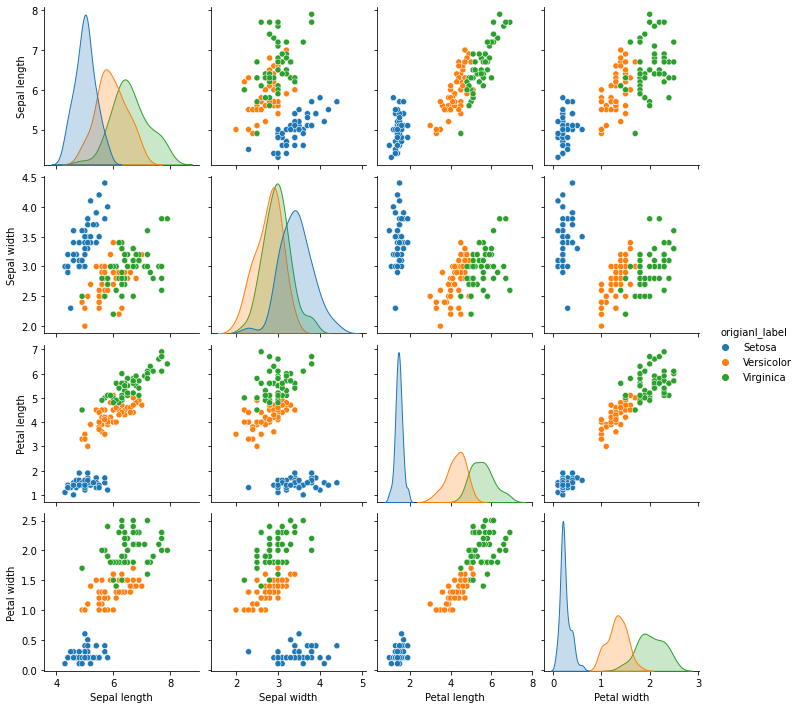

In [56]:
sns.color_palette("pastel")
sns.pairplot(train,hue='origianl_label')
plt.show()

In [57]:
TRAIN_LABEL_COL = "origianl_label"
TRAIN_FEATURES = [col for col in train.columns if col != TRAIN_LABEL_COL]
X = train[TRAIN_FEATURES]
y = train[TRAIN_LABEL_COL]

In [58]:
dbscan = DBSCAN(eps=0.5,min_samples=5)
y_pred = dbscan.fit_predict(X)

In [59]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [60]:
np.unique(dbscan.labels_)

array([-1,  0,  1], dtype=int64)

In [61]:
len(dbscan.core_sample_indices_)

117

In [62]:
dbscan.core_sample_indices_[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [63]:
dbscan.components_[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [64]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns=['pred_label']

val = pd.concat([X,y_pred_df],axis=1)

print(val)

     Sepal length  Sepal width  Petal length  Petal width  pred_label
0             5.1          3.5           1.4          0.2           0
1             4.9          3.0           1.4          0.2           0
2             4.7          3.2           1.3          0.2           0
3             4.6          3.1           1.5          0.2           0
4             5.0          3.6           1.4          0.2           0
..            ...          ...           ...          ...         ...
145           6.7          3.0           5.2          2.3           1
146           6.3          2.5           5.0          1.9           1
147           6.5          3.0           5.2          2.0           1
148           6.2          3.4           5.4          2.3           1
149           5.9          3.0           5.1          1.8           1

[150 rows x 5 columns]


New Clustering (DBSCAN Predicted Plot)

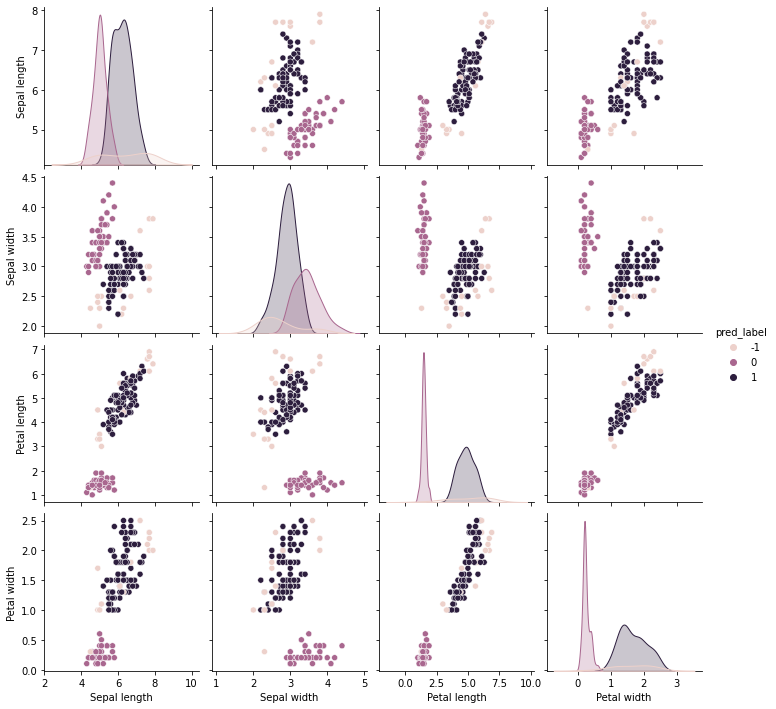

In [65]:
sns.color_palette("pastel")
sns.pairplot(val,hue='pred_label')
plt.show()